In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_excel("car.xlsx")

In [33]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [34]:
df.shape

(1728, 7)

In [35]:
df=df.drop_duplicates()

In [36]:
df.shape

(1728, 7)

In [37]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 108.0+ KB


In [39]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [40]:
df.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [41]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727],
           dtype='int64', length=1728)

In [42]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [43]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [44]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [45]:
df['buying'].replace('low',0,inplace=True)
df['buying'].replace('med',1,inplace=True)
df['buying'].replace('high',2,inplace=True)
df['buying'].replace('vhigh',3,inplace=True)
df['buying']=df['buying'].astype(int)
df['buying'].unique()

array([3, 2, 1, 0])

In [46]:
df['buying'].unique()

array([3, 2, 1, 0])

In [47]:
df['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [48]:
df['maint'].replace('low',0,inplace=True)
df['maint'].replace('med',1,inplace=True)
df['maint'].replace('high',2,inplace=True)
df['maint'].replace('vhigh',3,inplace=True)
df['maint']=df['maint'].astype(int)
df['maint'].unique()

array([3, 2, 1, 0])

In [49]:
df['doors'].unique()

array([2, 3, 4, '5more'], dtype=object)

In [50]:
df['doors'].replace('5more',5,inplace=True)
df['doors']=df['doors'].astype(int)
df['doors'].unique()

array([2, 3, 4, 5])

In [51]:
df['persons'].unique()

array([2, 4, 'more'], dtype=object)

In [52]:
df['persons'].replace('more',5,inplace=True)
df['persons']=df['persons'].astype(int)
df['persons'].unique()

array([2, 4, 5])

In [53]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [54]:
df['lug_boot'].replace('small',0,inplace=True)
df['lug_boot'].replace('med',1,inplace=True)
df['lug_boot'].replace('big',2,inplace=True)
df['lug_boot']=df['lug_boot'].astype(int)
df['lug_boot'].unique()

array([0, 1, 2])

In [55]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [56]:
df['safety'].replace('low',0,inplace=True)
df['safety'].replace('med',1,inplace=True)
df['safety'].replace('high',2,inplace=True)
df['safety']=df['safety'].astype(int)
df['safety'].unique()

array([0, 1, 2])

In [57]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [58]:
class_ = df['class']
classs = class_.copy()
le = LabelEncoder()
le.fit(classs)
classs = le.transform(classs)
df['class'] = classs

In [59]:
df['class'].unique()

array([2, 0, 3, 1])

In [60]:
df.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
class       int32
dtype: object

In [61]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,2
1,3,3,2,2,0,1,2
2,3,3,2,2,0,2,2
3,3,3,2,2,1,0,2
4,3,3,2,2,1,1,2
5,3,3,2,2,1,2,2
6,3,3,2,2,2,0,2
7,3,3,2,2,2,1,2
8,3,3,2,2,2,2,2
9,3,3,2,4,0,0,2


In [62]:
corr=df.corr()
corr

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,-1.356939e-15,4.191709e-15,7.886258e-16,-1.045866e-16,-4.082114e-16,0.039603
maint,-1.356939e-15,1.000000e+00,7.812681e-16,1.822741e-16,8.544286e-17,-7.826398e-17,0.062064
doors,4.191709e-15,7.812681e-16,1.000000e+00,-9.989138e-17,-1.632846e-17,2.801175e-17,-0.031327
persons,7.886258e-16,1.822741e-16,-9.989138e-17,1.000000e+00,-1.438481e-17,7.570954e-18,-0.332399
lug_boot,-1.045866e-16,8.544286e-17,-1.632846e-17,-1.438481e-17,1.000000e+00,1.927471e-18,-0.033184
safety,-4.082114e-16,-7.826398e-17,2.801175e-17,7.570954e-18,1.927471e-18,1.000000e+00,-0.301896
class,3.960256e-02,6.206372e-02,-3.132740e-02,-3.323985e-01,-3.318432e-02,-3.018964e-01,1.000000


In [64]:
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

<AxesSubplot:>

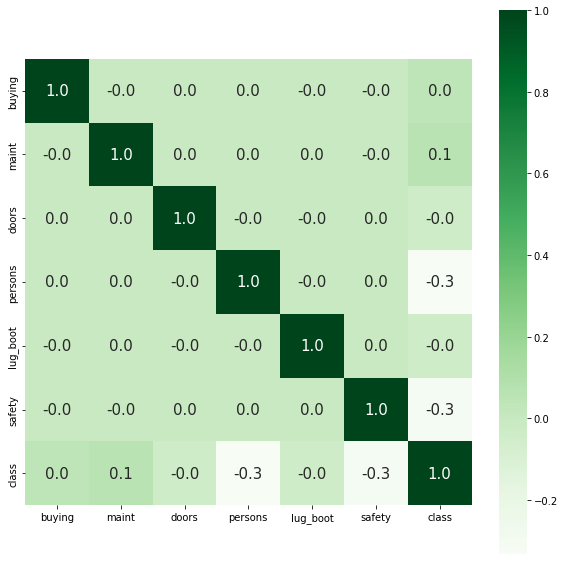

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [66]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
data=DFdata[['buying','maint','doors','persons','lug_boot','safety']]
labels = DFdata['class']
labels = label_encoder.fit_transform(labels) 

In [67]:
X = data  
y = labels

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1382, 6)
(346, 6)
(1382,)
(346,)


In [69]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(1382, 6) (1382,)


In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,50+1):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.9508670520231214
neighbors : 2 , score : 0.8901734104046243
neighbors : 3 , score : 0.9653179190751445
neighbors : 4 , score : 0.9421965317919075
neighbors : 5 , score : 0.9739884393063584
neighbors : 6 , score : 0.9364161849710982
neighbors : 7 , score : 0.976878612716763
neighbors : 8 , score : 0.9682080924855492
neighbors : 9 , score : 0.976878612716763
neighbors : 10 , score : 0.9682080924855492
neighbors : 11 , score : 0.976878612716763
neighbors : 12 , score : 0.9624277456647399
neighbors : 13 , score : 0.9682080924855492
neighbors : 14 , score : 0.9566473988439307
neighbors : 15 , score : 0.9653179190751445
neighbors : 16 , score : 0.9566473988439307
neighbors : 17 , score : 0.976878612716763
neighbors : 18 , score : 0.9682080924855492
neighbors : 19 , score : 0.9653179190751445
neighbors : 20 , score : 0.9653179190751445
neighbors : 21 , score : 0.9624277456647399
neighbors : 22 , score : 0.9508670520231214
neighbors : 23 , score : 0.953757225433526
ne

The accuracy of KNN is:  0.98
[[ 76   0   3   0]
 [  1  15   0   1]
 [  2   0 238   0]
 [  1   0   0   9]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        79
           1       1.00      0.88      0.94        17
           2       0.99      0.99      0.99       240
           3       0.90      0.90      0.90        10

    accuracy                           0.98       346
   macro avg       0.96      0.93      0.95       346
weighted avg       0.98      0.98      0.98       346



<AxesSubplot:>

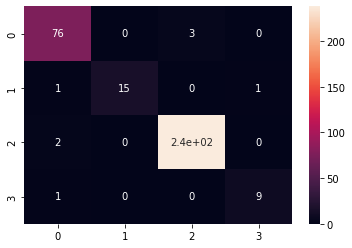

In [72]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [74]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.69 i= 1
The accuracy of Decision Tree Classification is:  0.75 i= 2
The accuracy of Decision Tree Classification is:  0.8 i= 3
The accuracy of Decision Tree Classification is:  0.83 i= 4
The accuracy of Decision Tree Classification is:  0.84 i= 5
The accuracy of Decision Tree Classification is:  0.89 i= 6
The accuracy of Decision Tree Classification is:  0.92 i= 7
The accuracy of Decision Tree Classification is:  0.96 i= 8
The accuracy of Decision Tree Classification is:  0.96 i= 9
The accuracy of Decision Tree Classification is:  0.97 i= 10
The accuracy of Decision Tree Classification is:  0.97 i= 11
The accuracy of Decision Tree Classification is:  0.97 i= 12
The accuracy of Decision Tree Classification is:  0.97 i= 13
The accuracy of Decision Tree Classification is:  0.97 i= 14
The accuracy of Decision Tree Classification is:  0.97 i= 15
The accuracy of Decision Tree Classification is:  0.97 i= 16
The accuracy of Decision Tree Clas

The accuracy of Decision Tree Classification is:  0.97
[[ 71   4   4   0]
 [  0  17   0   0]
 [  3   0 237   0]
 [  1   0   0   9]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        79
           1       0.81      1.00      0.89        17
           2       0.98      0.99      0.99       240
           3       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.93      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346



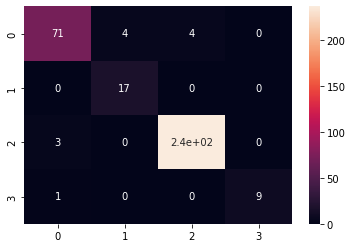

In [75]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.77
[[ 38   0  41   0]
 [ 14   0   3   0]
 [ 11   0 229   0]
 [ 10   0   0   0]]
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        79
           1       0.00      0.00      0.00        17
           2       0.84      0.95      0.89       240
           3       0.00      0.00      0.00        10

    accuracy                           0.77       346
   macro avg       0.34      0.36      0.35       346
weighted avg       0.70      0.77      0.73       346



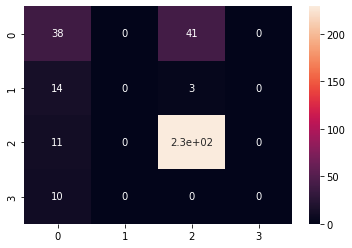

In [76]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.96
[[ 75   2   2   0]
 [  1  14   0   2]
 [  5   0 235   0]
 [  1   0   0   9]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        79
           1       0.88      0.82      0.85        17
           2       0.99      0.98      0.99       240
           3       0.82      0.90      0.86        10

    accuracy                           0.96       346
   macro avg       0.90      0.91      0.91       346
weighted avg       0.96      0.96      0.96       346



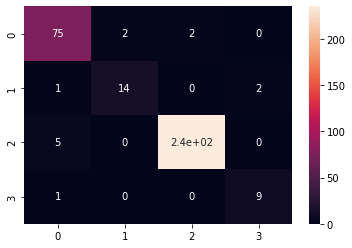

In [77]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.7254335260115607
[[ 22   5  16  36]
 [  6   3   0   8]
 [ 19   0 216   5]
 [  0   0   0  10]]
              precision    recall  f1-score   support

           0       0.47      0.28      0.35        79
           1       0.38      0.18      0.24        17
           2       0.93      0.90      0.92       240
           3       0.17      1.00      0.29        10

    accuracy                           0.73       346
   macro avg       0.49      0.59      0.45       346
weighted avg       0.78      0.73      0.73       346



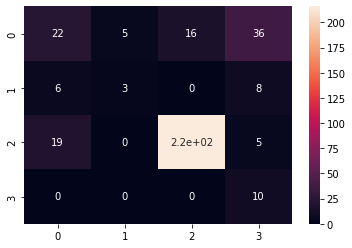

In [80]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))